## 5.2.2 Decision Trees Implementation
To implement the decision trees algorithm, we use the mini-case study customer churn dataset that we have previously pre-processed and saved in the `ChurnFinal.csv` file.  We use the following Python codes to import necessary libraries:

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

df = pd.read_csv('data/ChurnFinal.csv')
df_inputs = pd.get_dummies(df[['Gender', 'Age', 'PostalCode', 'Cash', 'CreditCard', 
            'Cheque','SinceLastTrx', 'SqrtTotal', 'SqrtMax', 'SqrtMin']])
df_label = df['Churn']

Based on our problem and data understanding for the customer churn case study (refer to Week 2 content), the solution requires an approach to classify if a customer is going to churn. Thus, we indicate the target attribute as Churn in the data set; we use `Gender`, `Age`, `PostalCode`, `Cash`, `CreditCard`, `Cheque`, `SinceLastTrx`, `SqrtTotal`, `SqrtMax`, and `SqrtMin` attributes as inputs to predict the churn by assigning them to user-defined variables `df_label` and df_inputs respectively for later use. 

We use the `get_dummies()` function to convert categorical to indicator attributes(s) to avoid incompatibility of data modeling methods that cannot handle categorical attributes, for example, Regression and Neural Network algorithms (we will apply these techniques in later sections). 

Next, we spit the original data set to train and test the model, using the Python `train_test_split()` function with the following example codes:

In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(df_inputs, df_label, 
             stratify=df_label, test_size=0.2, random_state=1) 

In the above codes, we split 80% of the data set for training the model and 20% (i.e., test_size=0.2) as a test set to assess the model.  The random state (random_state) is a seed to the random number generator to ensure numbers are generated in the same order. 

For a detailed explanation of the train_test_split() API parameters, refer to the official website https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split.

After splitting the data set into train and test sets, we define the decision tree as the data modeling technique using `DecisionTreeClassifier()`, and train the decision tree using `fit()` function the train data set (`X_train` and `Y_train`) in  function:

In [3]:
min_sample = int(len(df) * 0.1) 
dtree = DecisionTreeClassifier(criterion = 'entropy', splitter="best", max_depth=5, 
            min_samples_leaf=5, min_samples_split=min_sample, random_state=42) 
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=99, random_state=42)

In the above code, assuming we want to set the minimum number of records (i.e., 10% of the train data set) as the threshold to split a node via the assignment of `min_sample = int(len(df) * 0.1)`. 

For a detailed explanation of the DecisionTreeClassifier() API parameters, refer to the official website https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

To assess how well the decision tree model developed based on the criteria above, we use the test data (`X_test`) for the model to predict the churn outcomes using the `predict()` function. 

In [4]:
#Predict the response for test dataset
y_predict = dtree.predict(X_test)
print("Model Accuracy     : ", metrics.accuracy_score(Y_test, y_predict))

Model Accuracy     :  0.78


To assess the how well the classification outcomes, we can derive the model accuracy with the accuracy_score() function by comparing the predicted (i.e., `y_predict`) and actual (i.e., `y_test`) churn outcomes. 

After running all the codes together given above, we obtain a model accuracy of 0.78 printed on the console terminal as Model Accuracy :     0.78.  This result indicates that the model has an accuracy of 78%, implying that 78% of the time, it correctly classifies churn outcomes ('`yes`' or '`no`').

Besides accuracy, we will examine more measures of model performance in Week 6. 

To view the generated decision tree structure, we can plot the tree using the following Python codes:

<Figure size 640x480 with 0 Axes>

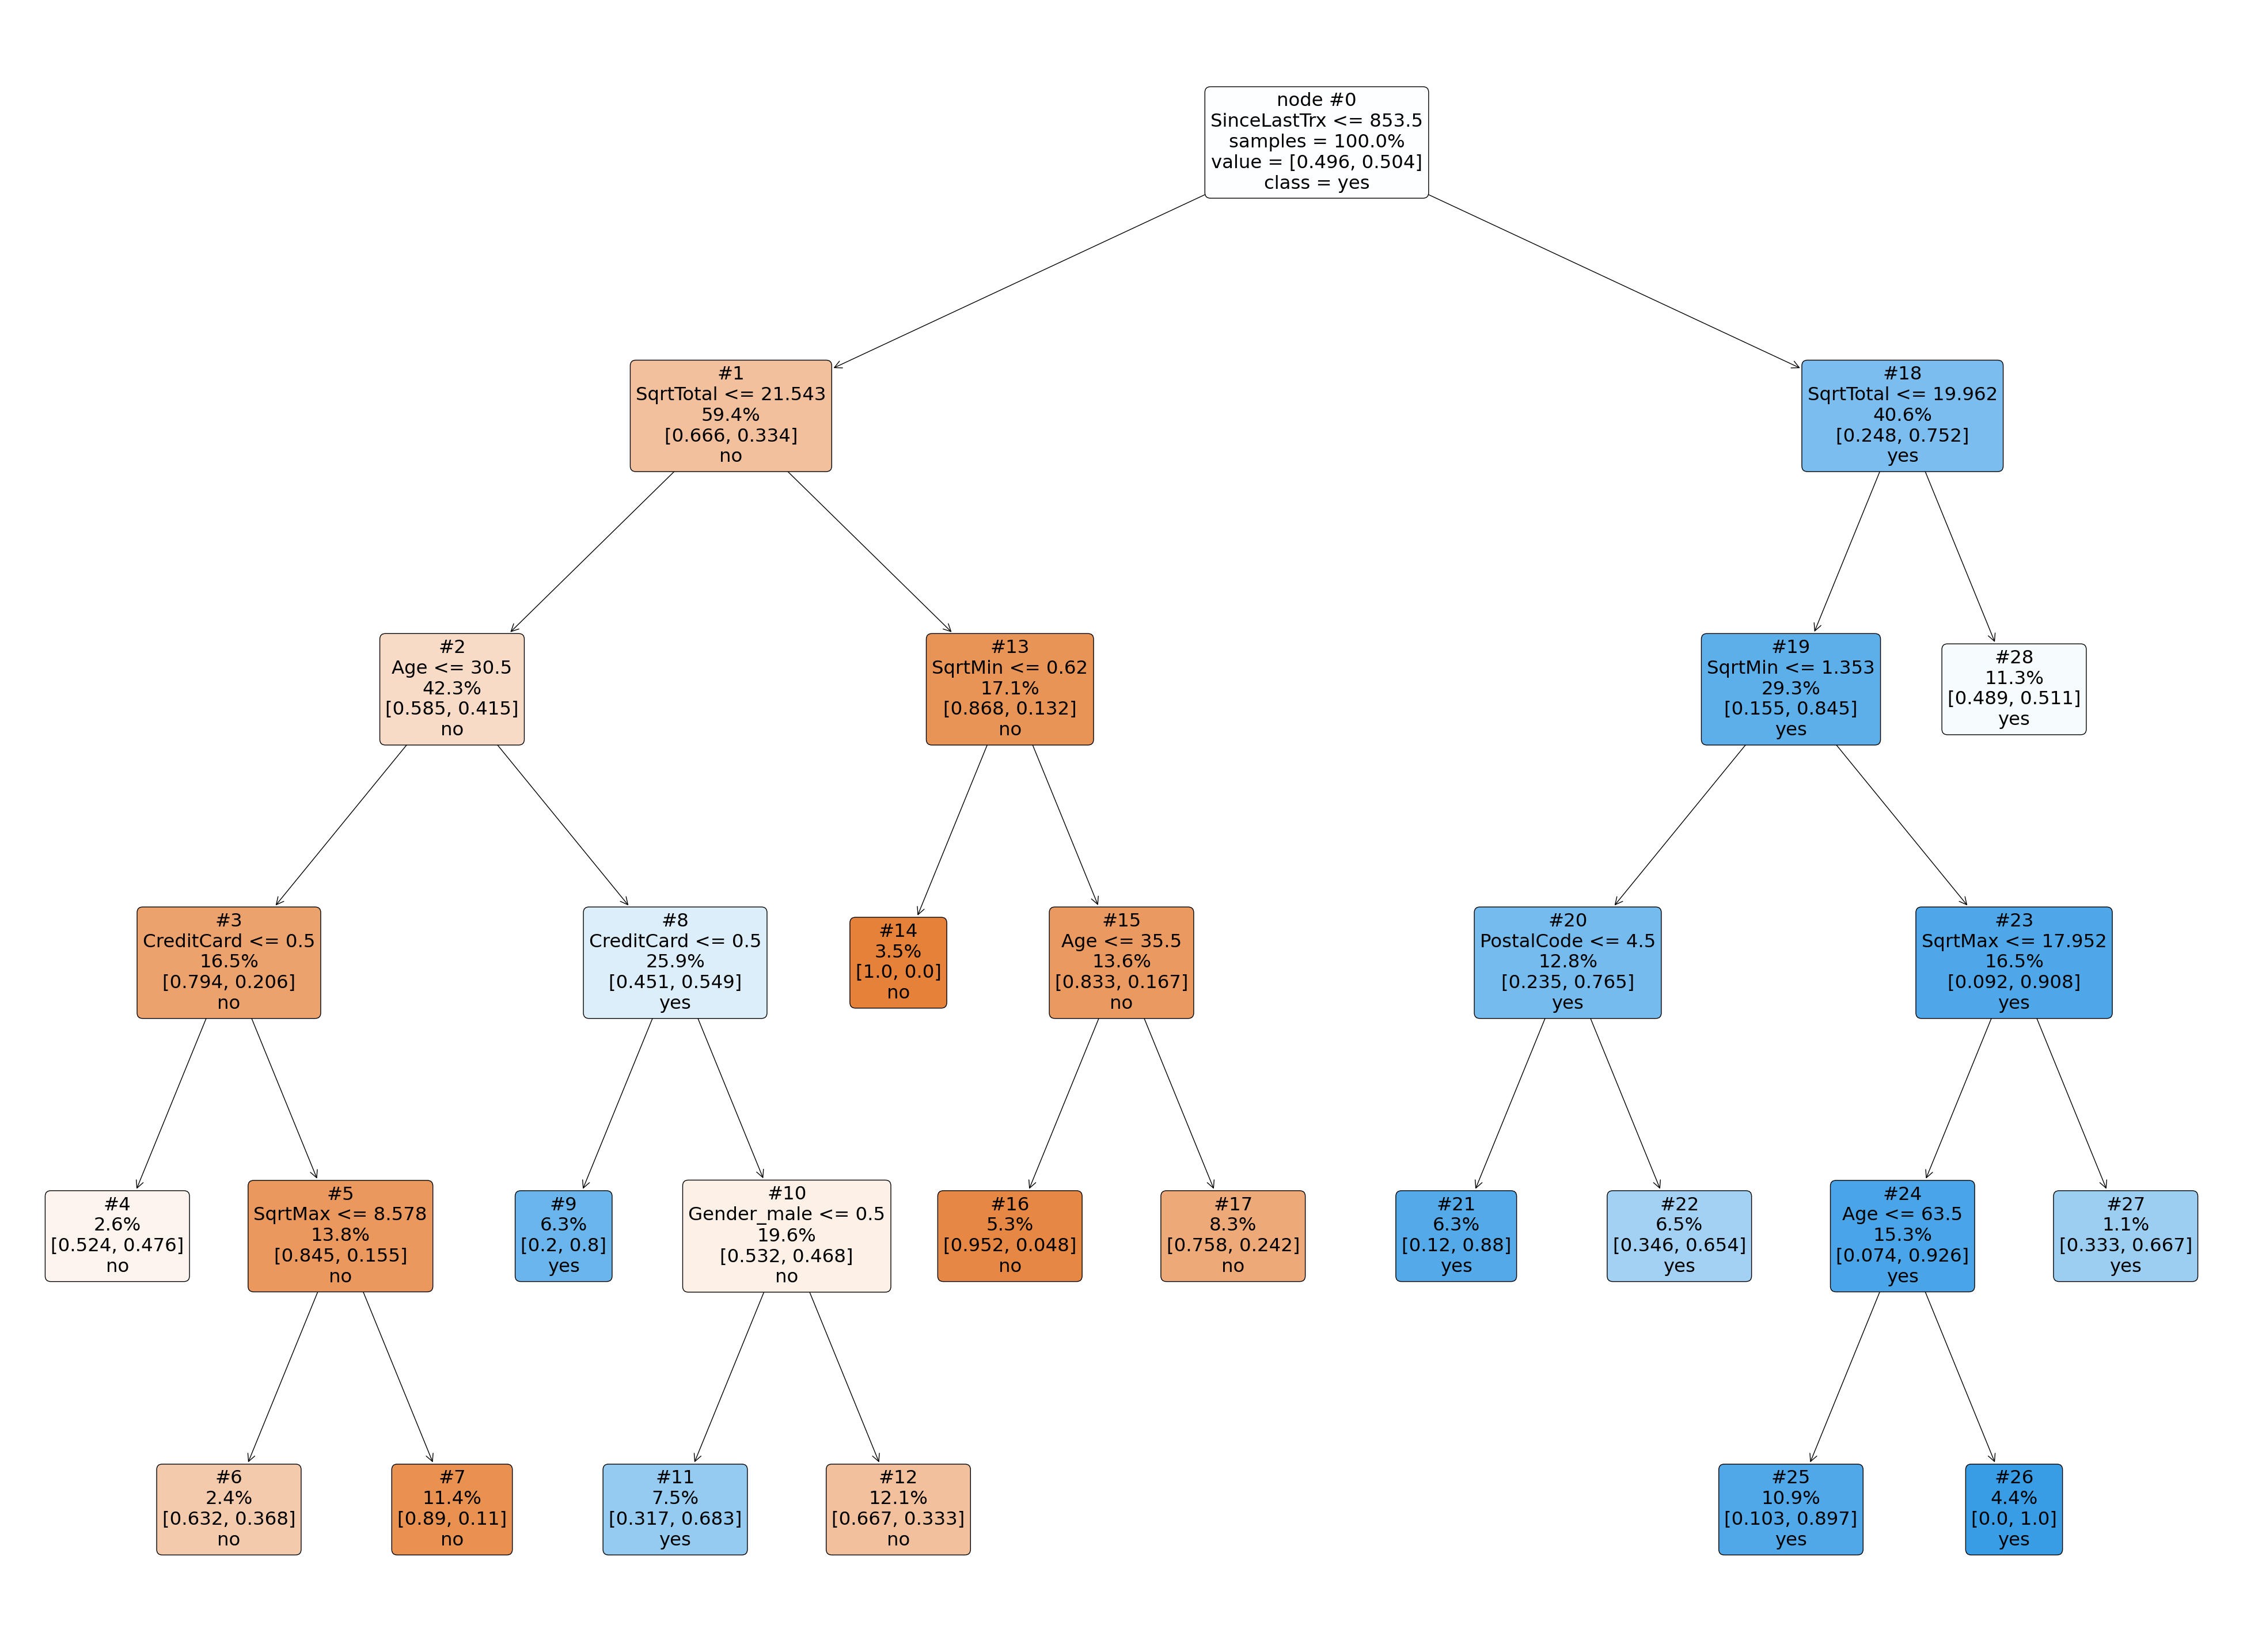

In [5]:
#plot tree
target = list(df['Churn'].unique())
feature_names = list(df_inputs.columns)
from sklearn import tree
from matplotlib import pyplot as plt
import os

plt.clf()

strFile = "plot_dtree.png"

if os.path.isfile(strFile):
   os.remove(strFile)   
fig = plt.figure(figsize=(50,37))
_ = tree.plot_tree(dtree, feature_names=feature_names, class_names=target, filled=True,
        label='root', node_ids=True, proportion=True,rounded=True, impurity=False)#, fontsize=20) 
fig.savefig('img/'+strFile)

To interpret the nodes, take the example of node #26. The predicted churn is 'yes', with 100% purity, i.e., 1.0 for 'yes' and 0.0 for 'no'.

For a detailed explanation of the plot_tree() API parameters, refer to the official website https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=plot_tree#sklearn.tree.plot_tree. 